<a href="https://colab.research.google.com/github/HowardHNguyen/ML_DL_Time_Series_by_Python/blob/main/Influenza_like_Illness_Forecasting_ARIMA_SARIMA_AR_NET_Neural_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description:

The California Department of Public Health (CDPH) Influenza Surveillance Program (CISP) is a collaborative effort between CDPH, the Centers for Disease Control and Prevention (CDC), Kaiser Permanente, California local health jurisdictions and the participating California sentinel providers and sentinel laboratories. Influenza surveillance in California is particularly important due to its coastal location with several ports of entry for flights and shipping from Asia. Annual influenza epidemics follow a winter seasonal pattern in the United States with typical activity peaking during late December to early February. CDPH obtains and analyzes clinical, and laboratory data year-round in an effort to determine the timing and impact of influenza activity and to determine how well circulating strains of the virus match those used in the current influenza vaccines.

Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39.
Values include:
2001-2002, 2002-2003, 2003-2004, 2004-2005, 2005-2006, 2006-2007, 2007-2008, 2008-2009, 2009-2010, 2010-2011, 2011-2012, 2012-2013, 2013-2014, 2014-2015, 2015-2016, 2016-2017, 2017-2018, 2018-2019, 2019-2020.

Weekending: Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY.

# Region

Values:

**Bay Area:**  Includes Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano, and Sonoma counties
California: All California counties

**Central:** Includes Calaveras, Fresno, Inyo, Kings, Madera, Mariposa, Merced, Mono, Monterey, San Benito, San Joaquin, Stanislaus, Tulare, and Tuolumne counties

**Lower Southern:** Includes Imperial, Orange, Riverside, San Bernardino, and San Diego counties

**Northern:** Includes Alpine, Amador, Butte, Colusa, Del Norte, El Dorado, Glenn, Humboldt, Lake, Lassen, Mendocino, Modoc, Nevada, Placer, Plumas, Sacramento, Shasta, Sierra, Siskiyou, Sutter, Tehama, Trinity, Yolo, and Yuba counties

**Upper Southern:** Includes Kern, Los Angeles, San Luis Obispo, Santa Barbara, and Ventura counties

Note: Not all counties in region have outpatient ILI data providers. View the [California Regional Map](https://cceanet.org/about-us/regions/).

# Columns Description:

**Season**:
Influenza surveillance season: Influenza surveillance seasons run from Week 40 through Week 39. (text)

**Weekending**:
Date of the last day included in the CDC MMWR Week (Saturday). Format MM/DD/YYYY. (number)

**Total_ILI**:
Number of outpatient visits for influenza-like illness (ILI). (number)

**Total_Patients_Seen**:
Total patients seen for any reason. (number)

**Percent_ILI**:
Percentage of patients that were due to influenza-like illness. (number)

**Number_Providers_Reporting**:
Number of providers reporting data during given week and region. (number)

# Load and Preprocess the Data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason_data.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

<ipython-input-3-e54fa5e9ed97>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


In [ ]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [ ]:
df.head()

season  date_code          region  Total_ILI  \
weekending                                                    
2001-10-06  2001-2002     200140        Bay Area          3   
2001-10-06  2001-2002     200140      California         25   
2001-10-06  2001-2002     200140         Central          0   
2001-10-06  2001-2002     200140  Lower Southern          2   
2001-10-06  2001-2002     200140        Northern         20   

            Total_Patients_Seen  Percent_ILI  Number_Providers_Reporting  
weekending                                                                
2001-10-06                  135         2.22                           2  
2001-10-06                 1211         2.06                          14  
2001-10-06                    0         0.00                           0  
2001-10-06                  336         0.60                           4  
2001-10-06                  529         3.78                           4

# EDA

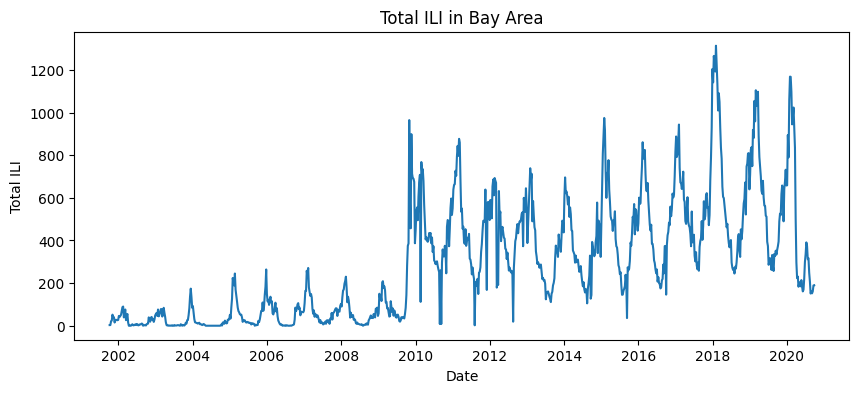

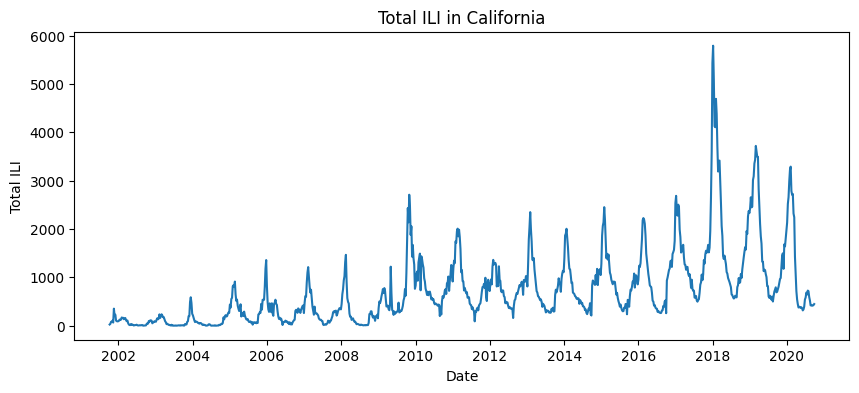

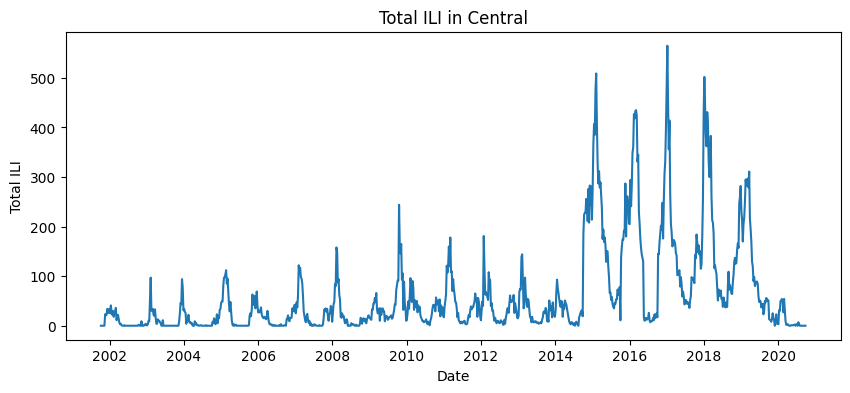

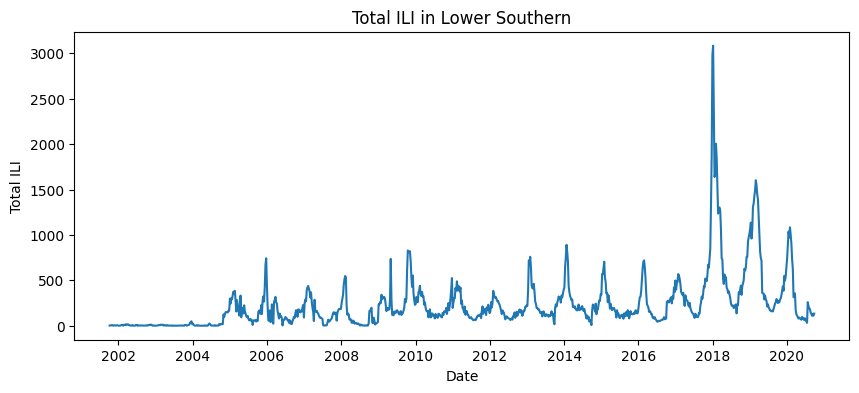

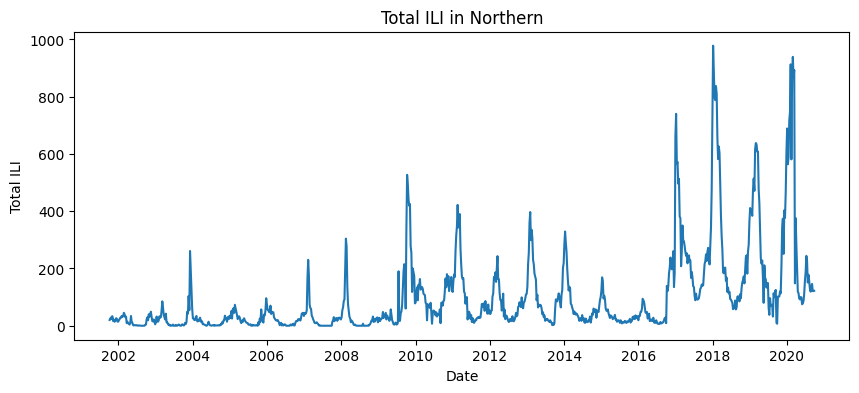

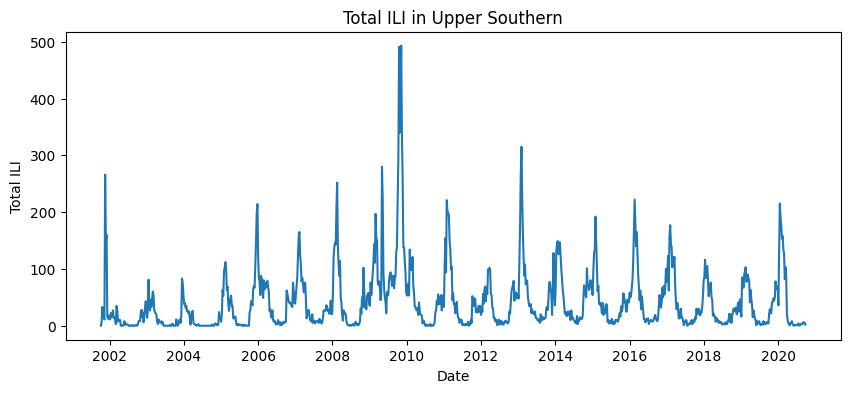

In [ ]:
import matplotlib.pyplot as plt

for region, data in region_data.items():
    plt.figure(figsize=(10, 4))
    plt.plot(data)
    plt.title(f'Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.show()

# Apply ARIMA Model
We'll apply the ARIMA model to each region's data

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, order=(5,1,0), steps=10):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

# Apply ARIMA to each region
arima_order = (5, 1, 0)  # Example order, we might tune it later

forecasts = {}
for region, data in region_data.items():
    forecasts[region] = fit_arima_forecast(data, order=arima_order)

# Show the forecast
for region, forecast in forecasts.items():
    print(f'Forecast for {region}:')
    print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Forecast for Bay Area:
2020-10-03    188.981503
2020-10-10    191.296426
2020-10-17    193.165681
2020-10-24    193.343804
2020-10-31    193.325381
2020-11-07    193.581021
2020-11-14    193.728416
2020-11-21    193.743094
2020-11-28    193.752697
2020-12-05    193.777264
Freq: W-SAT, Name: predicted_mean, dtype: float64
Forecast for California:
2020-10-03    452.188968
2020-10-10    453.277468
2020-10-17    453.865900
2020-10-24    455.915617
2020-10-31    457.833106
2020-11-07    458.613072
2020-11-14    458.913687
2020-11-21    459.132305
2020-11-28    459.413950
2020-12-05    459.632685
Freq: W-SAT, Name: predicted_mean, dtype: float64
Forecast for Central:
2020-10-03    5.330145e-19
2020-10-10    5.001483e-19
2020-10-17    5.395455e-19
2020-10-24    5.610990e-19
2020-10-31    5.942458e-19
2020-11-07    5.884042e-19
2020-11-14    5.949357e-19
2020-11-21    5.967220e-19
2020-11-28    5.986445e-19
2020-12-05    5.982848e-19
Freq: W-SAT, Name: predicted_mean, dtype: float64
Forecast f

# FORECAST
The 'fit_arima_forecast' function provides the forecast for each region.

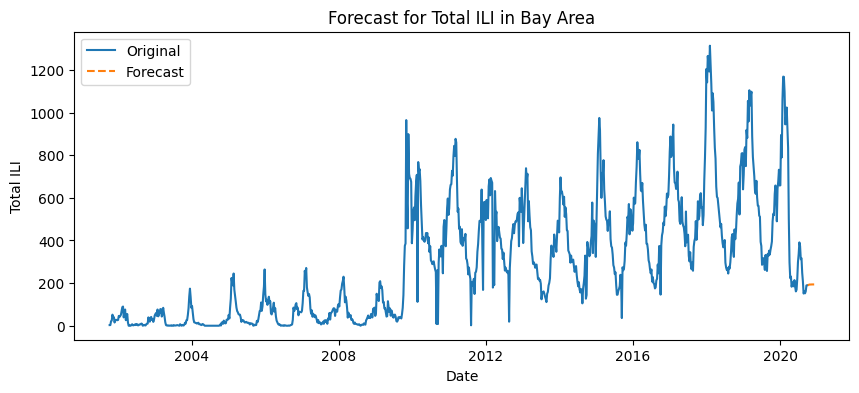

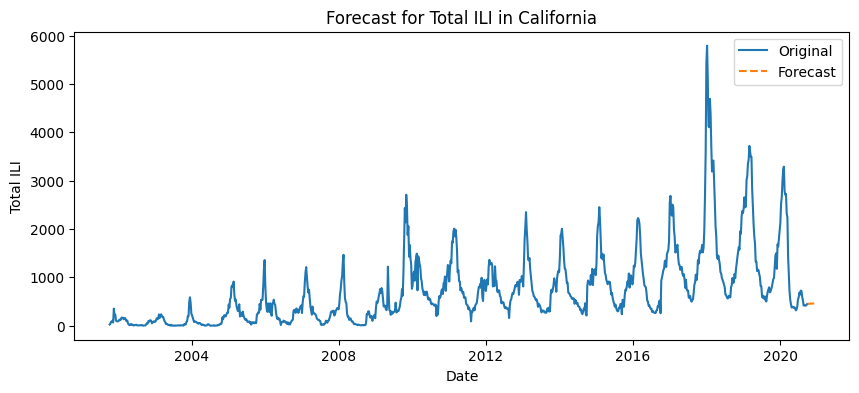

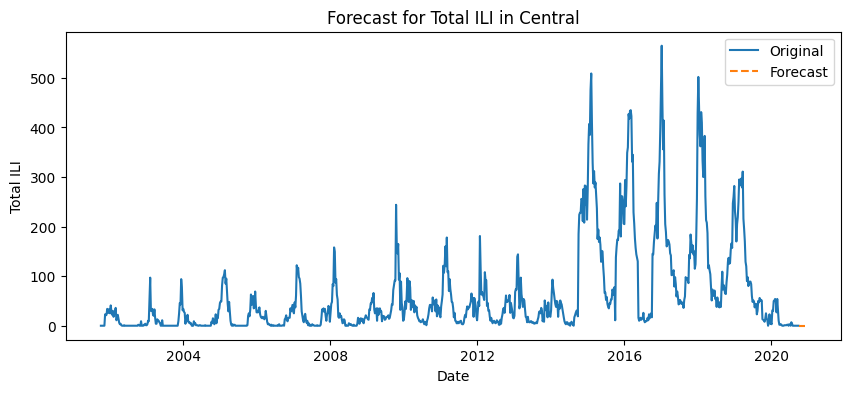

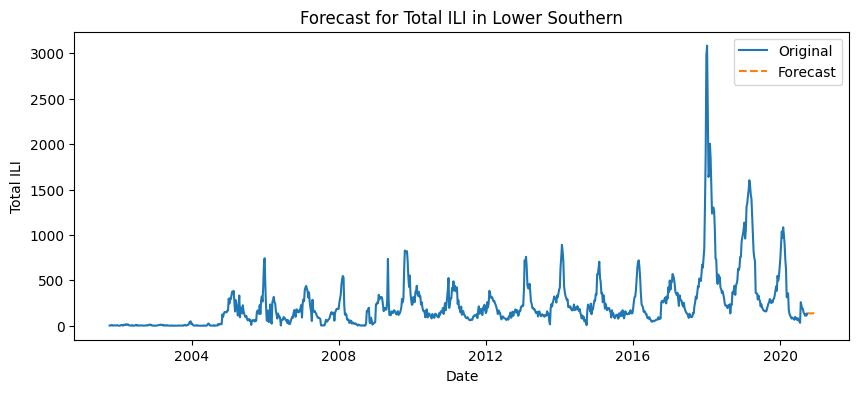

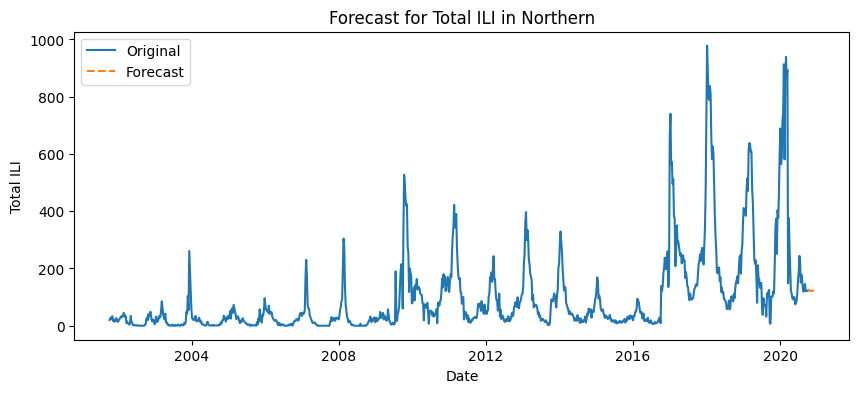

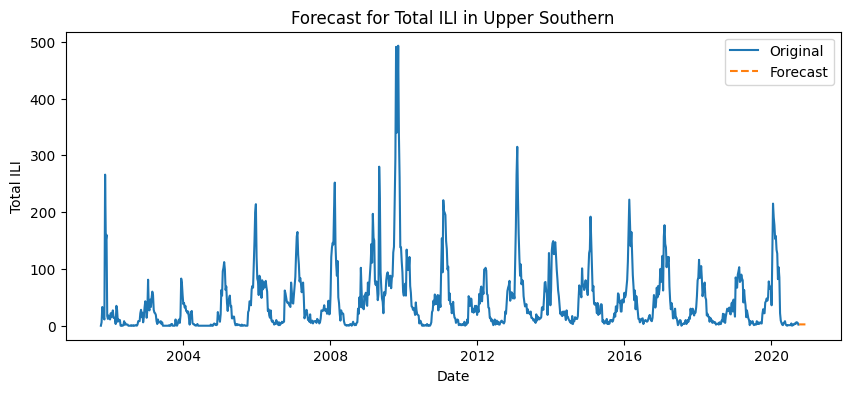

In [ ]:
for region, forecast in forecasts.items():
    plt.figure(figsize=(10, 4))
    plt.plot(region_data[region], label='Original')
    plt.plot(forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.legend()
    plt.show()

# Prediction for 5 years

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason-2010-2020.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

<ipython-input-28-fcdb901e2b8a>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])


In [ ]:
# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, order=(5,1,0), steps=200):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

In [ ]:
# Apply ARIMA to each region
arima_order = (5, 1, 0)  # Example order, you might want to tune this

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_arima_forecast(data, order=arima_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Forecast for Bay Area:
2016-12-10    596.897915
2016-12-17    592.006424
2016-12-24    597.931523
2016-12-31    600.073866
2017-01-07    597.187152
                 ...    
2020-09-05    597.978259
2020-09-12    597.978259
2020-09-19    597.978259
2020-09-26    597.978259
2020-10-03    597.978259
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Bay Area:
MAE: 234.30732615558776
MSE: 79820.59489593614
RMSE: 282.52538805554474


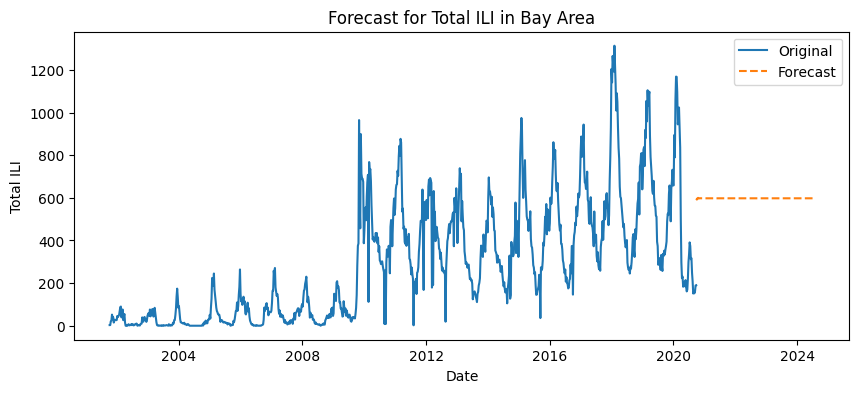

Forecast for California:
2016-12-10    1481.844599
2016-12-17    1502.326916
2016-12-24    1503.753380
2016-12-31    1513.285700
2017-01-07    1514.415010
                 ...     
2020-09-05    1516.991117
2020-09-12    1516.991117
2020-09-19    1516.991117
2020-09-26    1516.991117
2020-10-03    1516.991117
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for California:
MAE: 835.7003089727998
MSE: 1160492.9760216475
RMSE: 1077.2617954896791


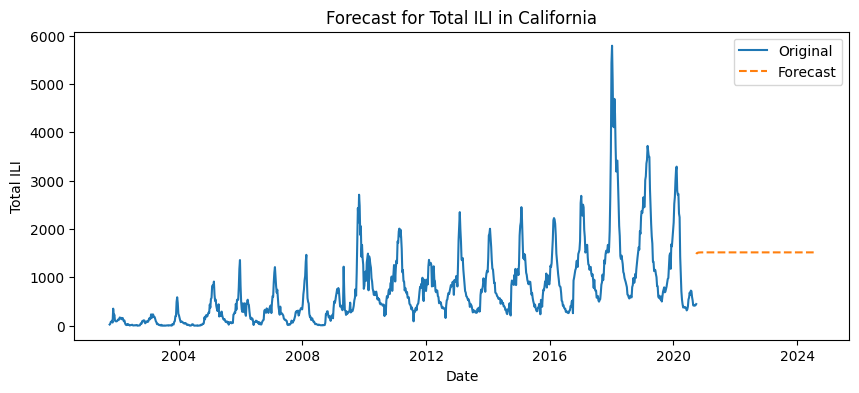

Forecast for Central:
2016-12-10    234.258708
2016-12-17    244.279069
2016-12-24    239.472654
2016-12-31    247.215837
2017-01-07    244.160500
                 ...    
2020-09-05    246.213858
2020-09-12    246.213858
2020-09-19    246.213858
2020-09-26    246.213858
2020-10-03    246.213858
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Central:
MAE: 161.37924654022217
MSE: 30970.016873664677
RMSE: 175.98300166113964


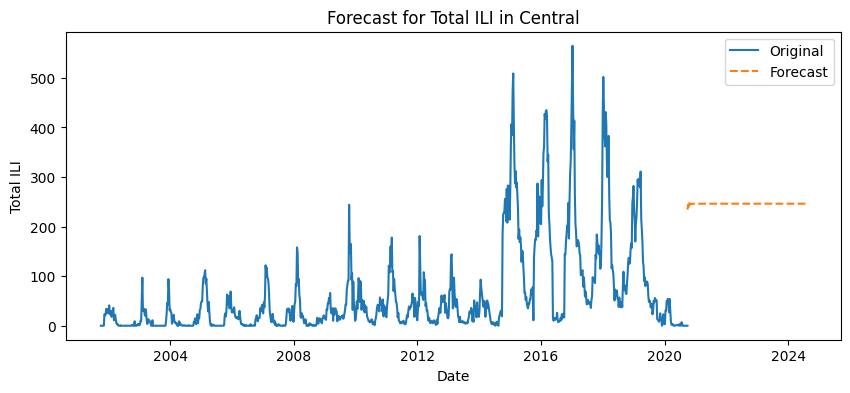

Forecast for Lower Southern:
2016-12-10    323.160066
2016-12-17    320.501809
2016-12-24    326.392003
2016-12-31    320.448110
2017-01-07    321.110714
                 ...    
2020-09-05    321.318698
2020-09-12    321.318698
2020-09-19    321.318698
2020-09-26    321.318698
2020-10-03    321.318698
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Lower Southern:
MAE: 332.6096918083356
MSE: 302658.4774404541
RMSE: 550.1440515360083


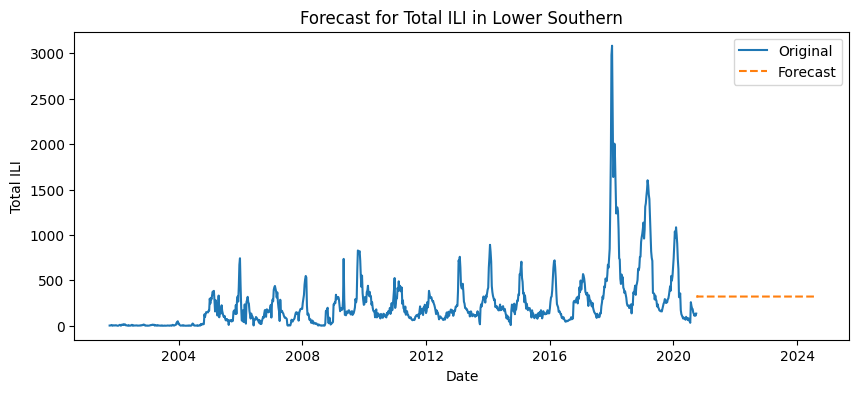

Forecast for Northern:
2016-12-10    220.358097
2016-12-17    219.805837
2016-12-24    218.244596
2016-12-31    219.033240
2017-01-07    219.467961
                 ...    
2020-09-05    219.459486
2020-09-12    219.459486
2020-09-19    219.459486
2020-09-26    219.459486
2020-10-03    219.459486
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Northern:
MAE: 162.69502815830302
MSE: 53909.5766932749
RMSE: 232.18435927786976


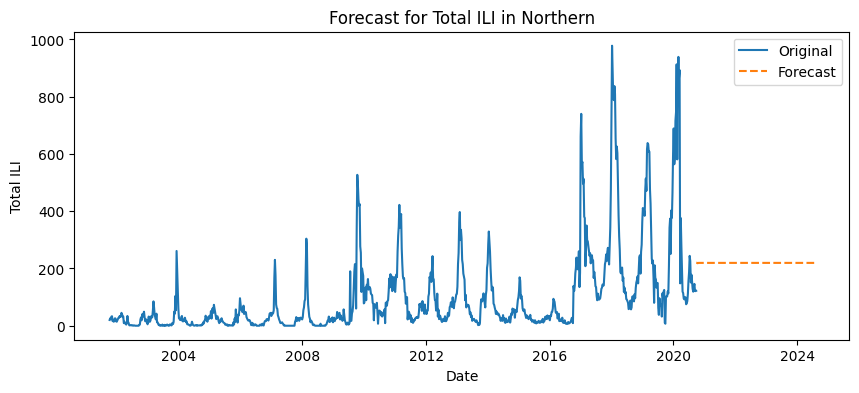

Forecast for Upper Southern:
2016-12-10    68.071351
2016-12-17    69.035851
2016-12-24    67.400424
2016-12-31    68.150876
2017-01-07    67.712539
                ...    
2020-09-05    67.818003
2020-09-12    67.818003
2020-09-19    67.818003
2020-09-26    67.818003
2020-10-03    67.818003
Freq: W-SAT, Name: predicted_mean, Length: 200, dtype: float64
Error Metrics for Upper Southern:
MAE: 48.21473226632221
MSE: 2860.2309632738516
RMSE: 53.48112716906639


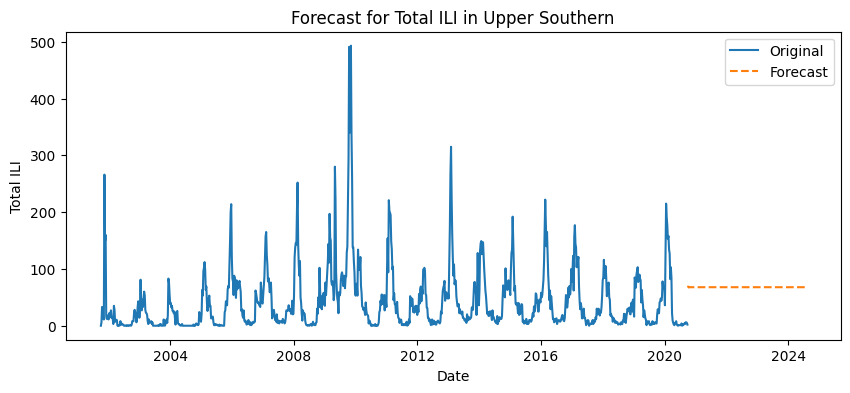

In [ ]:
# Display the forecasts and error metrics
for region, forecast in forecasts.items():
    print(f'Forecast for {region}:')
    print(forecast)

    print(f'Error Metrics for {region}:')
    print(f"MAE: {error_metrics[region]['MAE']}")
    print(f"MSE: {error_metrics[region]['MSE']}")
    print(f"RMSE: {error_metrics[region]['RMSE']}")

    plt.figure(figsize=(10, 4))
    plt.plot(region_data[region], label='Original')
    plt.plot(pd.date_range(start=region_data[region].index[-1], periods=200, freq='W'), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.legend()
    plt.show()

The forecast results indicate that the ARIMA model's predictions for these regions are not aligning well with the observed data, as suggested by the high error metrics (MAE, MSE, RMSE) and the forecast plot showing a flat future trend. Here are a few suggestions to improve the ARIMA model's performance:

# Parameter Tuning
The ARIMA model parameters (p, d, q) need to be tuned carefully. The current parameters (5, 1, 0) might not be the best fit. You can use a grid search to find optimal parameters.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define the p, d, and q parameters to take any value between 0 and 5
p = d = q = range(0, 6)
# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Define a function to find the best ARIMA model
def find_best_arima_model(data):
    best_aic = float("inf")
    best_pdq = None
    for param in pdq:
        try:
            temp_model = ARIMA(data, order=param)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
        except:
            continue
    return best_pdq

# Find the best ARIMA parameters for each region
best_pdq = {}
for region, data in region_data.items():
    best_pdq[region] = find_best_arima_model(data)
    print(f'Best ARIMA parameters for {region}: {best_pdq[region]}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Bay Area: (3, 1, 5)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequen

Best ARIMA parameters for California: (1, 0, 5)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Central: (5, 3, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Lower Southern: (0, 5, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Northern: (0, 5, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Best ARIMA parameters for Upper Southern: (5, 1, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA parameters for Upper Southern: (5, 1, 4)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

In [ ]:
# Find the best ARIMA parameters for each region
best_pdq = {}
for region, data in region_data.items():
    best_pdq[region] = find_best_arima_model(data)
    print(f'Best ARIMA parameters for {region}: {best_pdq[region]}')

# Seasonal ARIMA (SARIMA)
As our data shows seasonality, a seasonal ARIMA model might be more appropriate. We can use the seasonal_order parameter to model seasonality.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model
def fit_sarima_forecast(data, order=(5,1,0), seasonal_order=(1,1,1,52), steps=260):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

In [ ]:
# Apply SARIMA to each region
sarima_order = (5, 1, 0)  # Example order, you might want to tune this
seasonal_order = (1, 1, 1, 52)  # Example seasonal order, you might want to tune this

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_sarima_forecast(data, order=sarima_order, seasonal_order=seasonal_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  

Forecast for Bay Area:
2018-09-29    370.904223
2018-10-06    474.814692
2018-10-13    481.243594
2018-10-20    492.197519
2018-10-27    542.944067
                 ...    
2023-08-19    413.085395
2023-08-26    443.218930
2023-09-02    454.978271
2023-09-09    510.182058
2023-09-16    471.168950
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Bay Area:
MAE: 132.23443563206425
MSE: 28025.315158503712
RMSE: 167.4076317212083


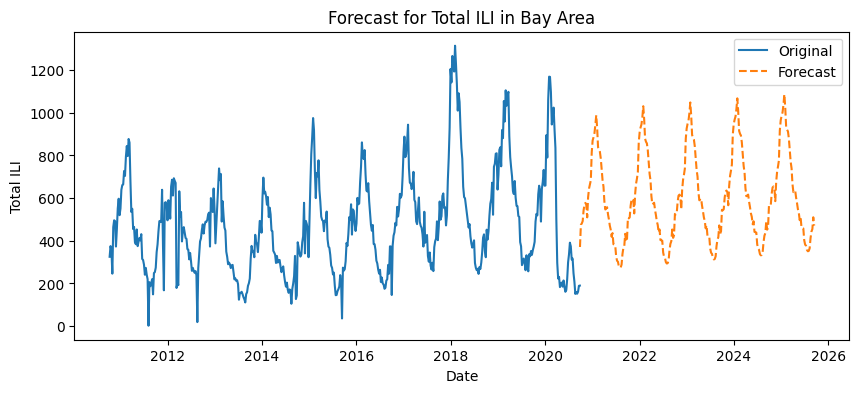

Forecast for California:
2018-09-29     930.480470
2018-10-06    1263.561094
2018-10-13    1241.814081
2018-10-20    1376.781815
2018-10-27    1450.543743
                 ...     
2023-08-19     914.619925
2023-08-26    1076.750151
2023-09-02    1102.468224
2023-09-09    1238.869363
2023-09-16    1159.208245
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for California:
MAE: 479.89765454479
MSE: 451801.6570089611
RMSE: 672.1619276699337


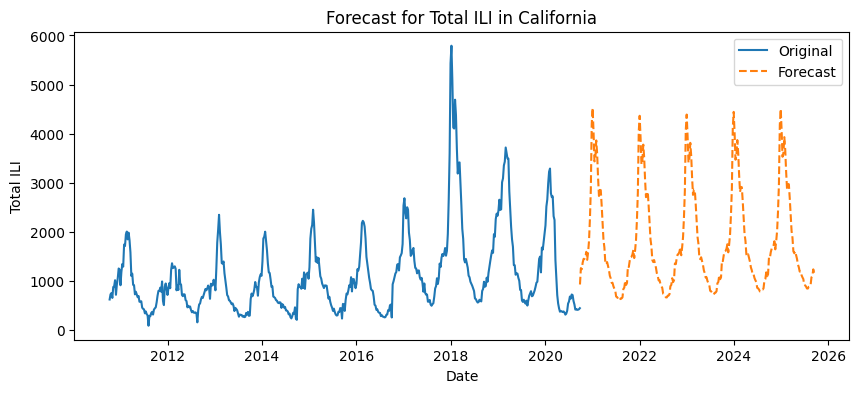

Forecast for Central:
2018-09-29     76.494016
2018-10-06    150.174096
2018-10-13    152.486094
2018-10-20    178.482411
2018-10-27    181.881503
                 ...    
2023-08-19     96.714835
2023-08-26    122.221825
2023-09-02    106.470455
2023-09-09    110.642581
2023-09-16    108.046684
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Central:
MAE: 102.1790983328597
MSE: 19936.065463628987
RMSE: 141.19513257768125


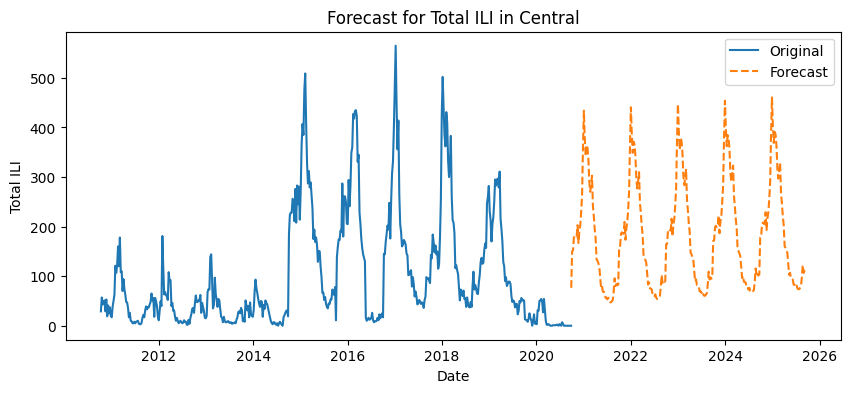

Forecast for Lower Southern:
2018-09-29    402.064966
2018-10-06    454.883040
2018-10-13    443.661156
2018-10-20    514.831924
2018-10-27    511.136917
                 ...    
2023-08-19    454.926262
2023-08-26    509.824479
2023-09-02    515.867179
2023-09-09    593.227872
2023-09-16    577.446815
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Lower Southern:
MAE: 308.74304892410447
MSE: 164640.88214660645
RMSE: 405.7596359257614


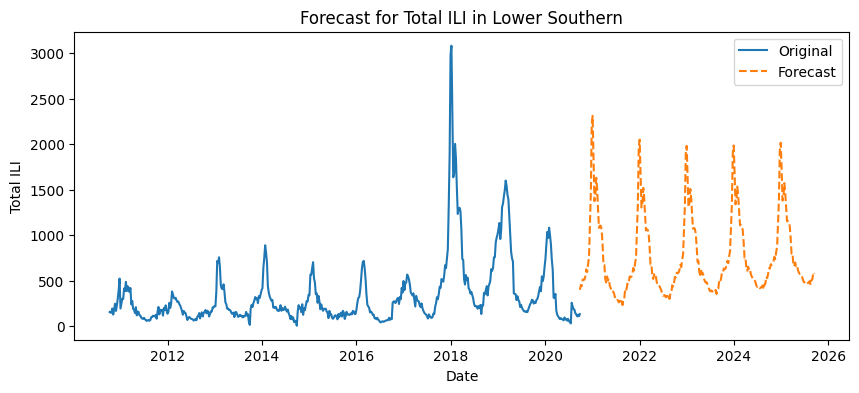

Forecast for Northern:
2018-09-29     86.376823
2018-10-06    140.130488
2018-10-13    151.024209
2018-10-20    159.572547
2018-10-27    181.545579
                 ...    
2023-08-19     83.820473
2023-08-26    105.002760
2023-09-02    109.096625
2023-09-09    109.794653
2023-09-16    103.525124
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Northern:
MAE: 101.08708996606363
MSE: 23431.33087642792
RMSE: 153.07295932472175


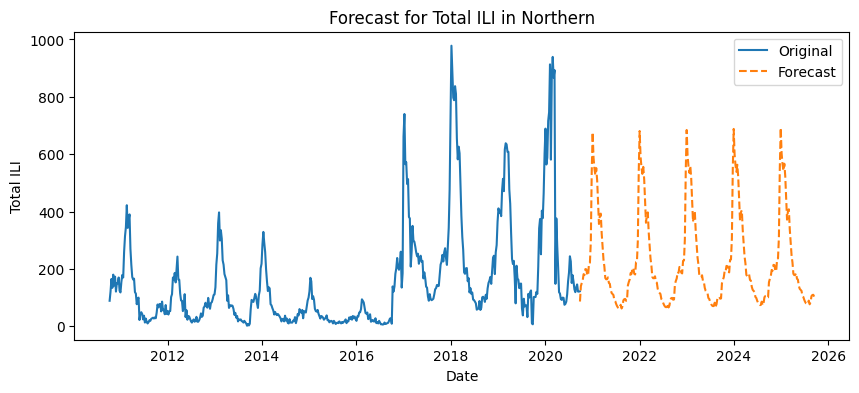

Forecast for Upper Southern:
2018-09-29    25.329809
2018-10-06    33.358009
2018-10-13    38.348892
2018-10-20    49.526320
2018-10-27    52.949651
                ...    
2023-08-19    18.047973
2023-08-26    18.792447
2023-09-02    21.457365
2023-09-09    17.610661
2023-09-16    23.261431
Freq: W-SAT, Name: predicted_mean, Length: 260, dtype: float64
Error Metrics for Upper Southern:
MAE: 18.878564741692482
MSE: 654.5735533476047
RMSE: 25.584635102881666


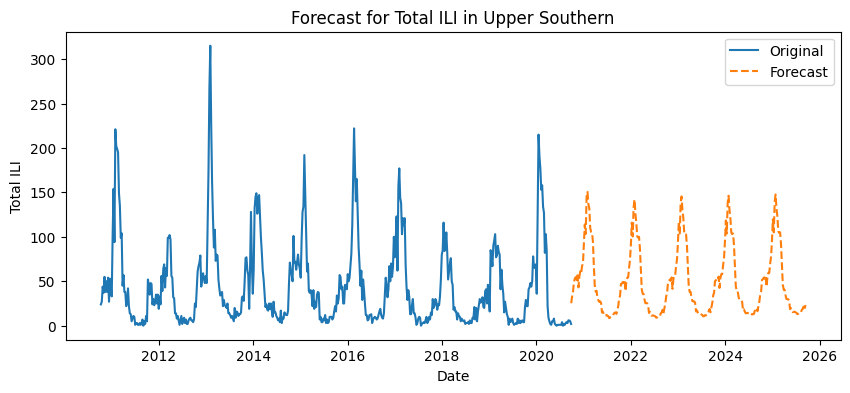

In [ ]:
# Display the forecasts and error metrics
for region, forecast in forecasts.items():
    print(f'Forecast for {region}:')
    print(forecast)

    print(f'Error Metrics for {region}:')
    print(f"MAE: {error_metrics[region]['MAE']}")
    print(f"MSE: {error_metrics[region]['MSE']}")
    print(f"RMSE: {error_metrics[region]['RMSE']}")

    plt.figure(figsize=(10, 4))
    plt.plot(region_data[region], label='Original')
    plt.plot(pd.date_range(start=region_data[region].index[-1], periods=260, freq='W'), forecast, label='Forecast', linestyle='--')
    plt.title(f'Forecast for Total ILI in {region}')
    plt.xlabel('Date')
    plt.ylabel('Total ILI')
    plt.legend()
    plt.show()

In [ ]:
# Summarize all of these error value in a table view:
import pandas as pd

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

           Region         MAE            MSE        RMSE
0        Bay Area  132.234436   28025.315159  167.407632
1      California  479.897655  451801.657009  672.161928
2         Central  102.179098   19936.065464  141.195133
3  Lower Southern  308.743049  164640.882147  405.759636
4        Northern  101.087090   23431.330876  153.072959
5  Upper Southern   18.878565     654.573553   25.584635


# Analysis of Error Metrics and Forecast Plot for Upper Southern
**Error Metrics for Upper Southern:**

- MAE (Mean Absolute Error): 18.88
- MSE (Mean Squared Error): 654.57
- RMSE (Root Mean Squared Error): 25.58

**Forecast Plot:**

- The forecast plot for the Upper Southern region shows historical data from around 2010 to 2020 and the forecasted data from 2020 to 2025.

# Interpretation of Error Metrics
- MAE (Mean Absolute Error):

  - Value: 18.88
  - Interpretation: On average, the model's predictions are off by about 19 cases, which indicates a low average prediction error. Given the range of ILI values in the data, this suggests good performance.

- MSE (Mean Squared Error):

  - Value: 654.57
  - Interpretation: The MSE is significantly lower compared to the previous regions' models. This suggests fewer large errors, as squaring the errors emphasizes larger discrepancies more.

- RMSE (Root Mean Squared Error):

  - Value: 25.58
  - Interpretation: The RMSE is 25.58, indicating that the typical prediction error is about 26 cases. This is relatively low and suggests good model performance.

# Forecast Plot Interpretation
- Seasonal Pattern: The forecasted data maintains the clear seasonal pattern observed in the historical data, indicating that the model effectively captures seasonality.
- Trend: There is no strong increasing or decreasing trend, which matches the historical pattern. The forecast continues the periodic peaks and troughs, consistent with past data.

# Comparison with Previous Models
- Lower Error Metrics: The MAE, MSE, and RMSE for the Upper Southern region are all lower compared to the metrics for the Bay Area and Northern regions. This indicates that the model performs better in this region.
- Better Fit: The lower error metrics and the forecast plot both suggest that the model has a better fit for the Upper Southern data, capturing the patterns more accurately.

# Summary
The results for the Upper Southern region indicate a much better model performance compared to the previous regions:

- Low MAE and RMSE: The low MAE (18.88) and RMSE (25.58) suggest that the model's predictions are quite accurate, with average errors being a small fraction of the typical ILI values in the dataset.
- Low MSE: The MSE (654.57) is significantly lower, indicating fewer large errors.
- Accurate Forecast: The forecast plot shows that the model accurately captures the seasonal patterns and periodicity in the data.

# Recommendations
- Model Robustness: Given the good performance in the Upper Southern region, consider applying similar modeling techniques or parameter tuning to other regions to improve their forecasts.
- Residual Analysis: Continue to examine residuals and diagnostics for the Upper Southern region to ensure there are no underlying issues.
- Generalization: Validate the model performance across different time periods and potential future data to ensure the robustness and generalization of the model.

Overall, the SARIMA model performs well for the Upper Southern region, as evidenced by the low error metrics and the accurate forecast plot. This approach can potentially be generalized or adapted to improve forecasts in other regions as well.

# Consider Data Preprocessing
Ensure that our data is stationary by using techniques such as differencing. You can check for stationarity using the Augmented Dickey-Fuller (ADF) test and apply differencing if necessary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
for region, data in region_data.items():
    result = adfuller(data)
    print(f'ADF Statistic for {region}: {result[0]}')
    print(f'p-value for {region}: {result[1]}')

    if result[1] > 0.05:
        print(f'{region} is not stationary')
        # Apply differencing if necessary
        data_diff = data.diff().dropna()
        region_data[region] = data_diff
    else:
        print(f'{region} is stationary')

ADF Statistic for Bay Area: -4.308710139961989
p-value for Bay Area: 0.0004290350663197709
Bay Area is stationary
ADF Statistic for California: -5.416266423957285
p-value for California: 3.130681221992622e-06
California is stationary
ADF Statistic for Central: -5.305886583285889
p-value for Central: 5.323991218528277e-06
Central is stationary
ADF Statistic for Lower Southern: -6.0309065313563694
p-value for Lower Southern: 1.4187774464901064e-07
Lower Southern is stationary
ADF Statistic for Northern: -5.8057758861624364
p-value for Northern: 4.520273174200667e-07
Northern is stationary
ADF Statistic for Upper Southern: -6.790973516304878
p-value for Upper Southern: 2.3652222066913916e-09
Upper Southern is stationary


# Model Diagnostics
Examine the residuals of the model to ensure they resemble white noise.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


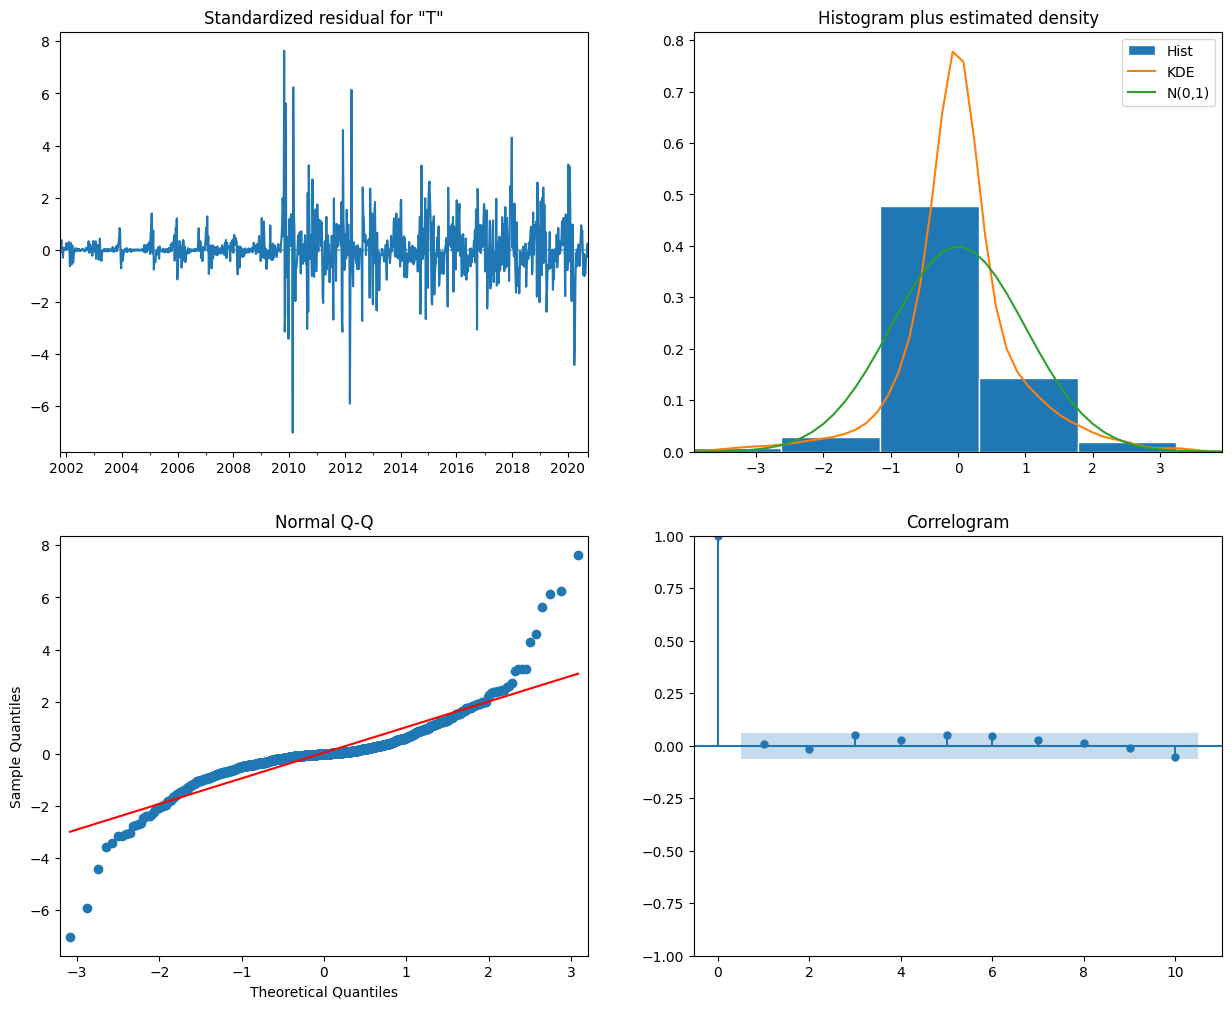

In [ ]:
# Fit a sample model for diagnostics
region = 'Bay Area'
data = region_data[region]
model = ARIMA(data, order=best_pdq[region])
model_fit = model.fit()

# Diagnostic plots
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

The model diagnostics plots provide valuable insights into the performance and appropriateness of the SARIMA model. Let's interpret each of the plots:

# 1. Standardized Residual Plot
- Plot Description: This plot shows the residuals (differences between the actual and predicted values) over time.
- Interpretation:
  - Residuals should be randomly scattered around zero without any obvious patterns.
  - In the plot, the residuals seem to fluctuate around zero, which is a good sign. However, there are periods, especially around 2008-2010, where the residuals show large deviations. This indicates that the model may not be capturing some underlying patterns or anomalies during these periods.

# 2. Histogram Plus Estimated Density
- Plot Description: This plot shows the distribution of residuals along with a kernel density estimate (KDE) and a normal distribution curve (N(0,1)).
- Interpretation:
  - Ideally, the residuals should follow a normal distribution centered around zero.
  - In the plot, the histogram indicates that the residuals are roughly normally distributed but with some deviations. The KDE (orange line) follows a similar trend to the normal distribution (green line), but there are discrepancies, suggesting the residuals may not be perfectly normal.

# 3. Normal Q-Q Plot
- Plot Description: This plot compares the quantiles of the residuals to the quantiles of a standard normal distribution.
- Interpretation:
  - If the residuals are normally distributed, the points should lie along the red line.
  - In the plot, the points generally follow the red line but deviate at the tails, indicating the presence of some outliers or non-normality in the residuals.

# 4. Correlogram (ACF of Residuals)
- Plot Description: This plot shows the autocorrelation function (ACF) of the residuals.
- Interpretation:
  -For a well-fitted model, the residuals should show no significant autocorrelation. Most of the autocorrelations should lie within the blue confidence intervals.
  - In the plot, the autocorrelations are mostly within the confidence intervals, suggesting that there is no significant autocorrelation in the residuals. This indicates that the SARIMA model has successfully captured the temporal dependencies in the data.

# Recommendations
- Address Anomalies and Outliers: The presence of large deviations in residuals during certain periods (e.g., around 2008-2010) suggests that there may be anomalies or outliers that the model is not capturing. Investigate these periods to understand the underlying causes and consider incorporating additional explanatory variables or using more robust modeling techniques.
- Further Model Tuning: Continue refining the SARIMA model parameters to improve the fit. Consider using automated tools like pmdarima for parameter selection.
- Non-Normal Residuals: Although the residuals are roughly normally distributed, there are some deviations. Consider using transformations (e.g., log transformation) to stabilize variance or applying a different error distribution if the normality assumption is critical.
- Additional Diagnostics: Perform additional diagnostic tests, such as the Ljung-Box test, to statistically assess the autocorrelation of residuals.

# Conclusion
The SARIMA model shows a reasonable fit with residuals centered around zero and no significant autocorrelation. However, there are some deviations from normality and large residuals during certain periods, indicating room for improvement. Further investigation and model tuning can help address these issues and improve the forecast accuracy.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

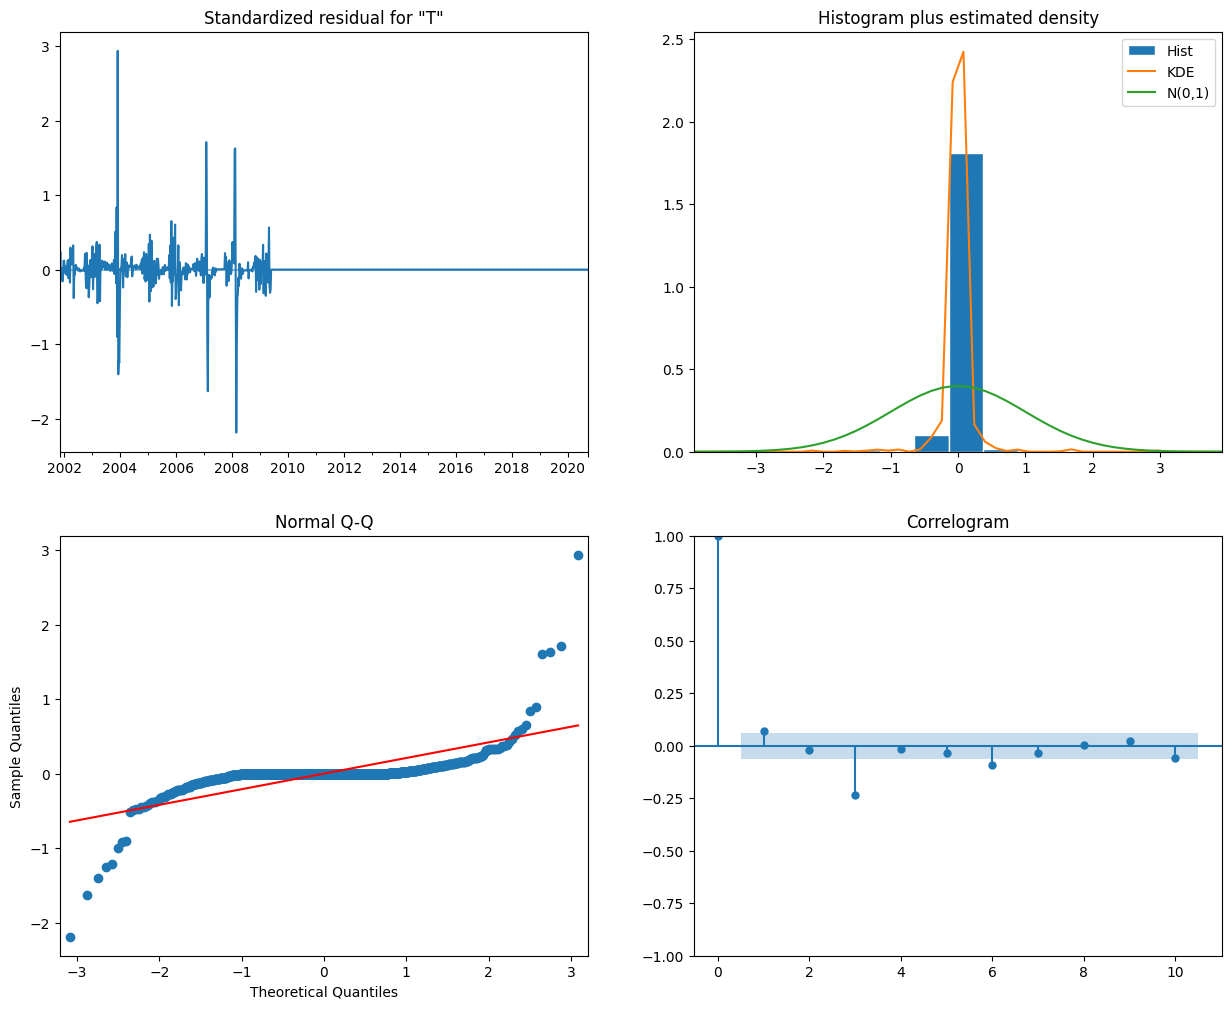

In [ ]:
# Fit a sample model for diagnostics
region = 'Northern'
data = region_data[region]
model = ARIMA(data, order=best_pdq[region])
model_fit = model.fit()

# Diagnostic plots
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

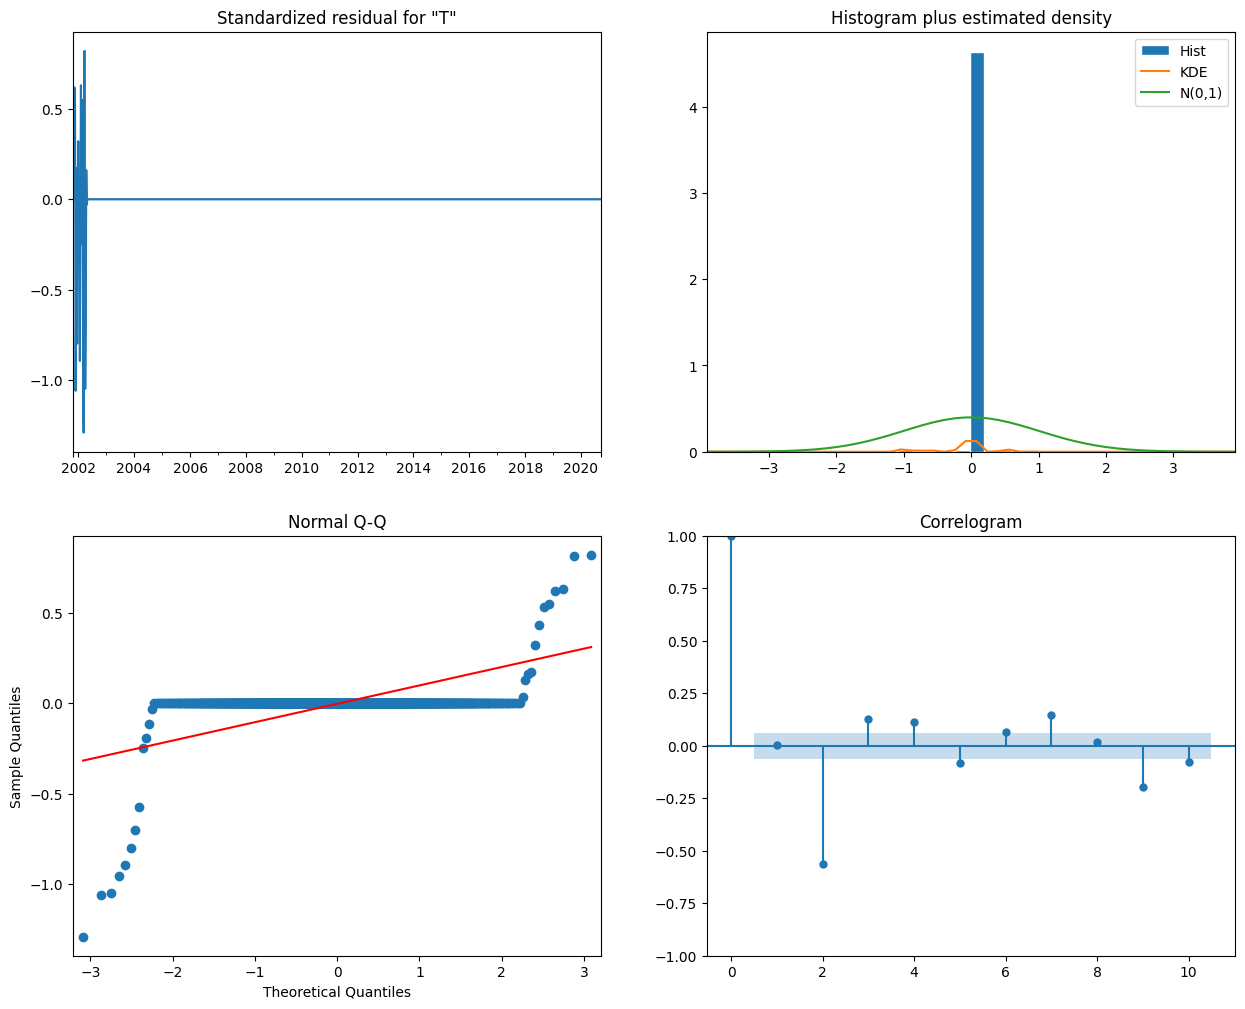

In [ ]:
# Fit a sample model for diagnostics
region = 'Central'
data = region_data[region]
model = ARIMA(data, order=best_pdq[region])
model_fit = model.fit()

# Diagnostic plots
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

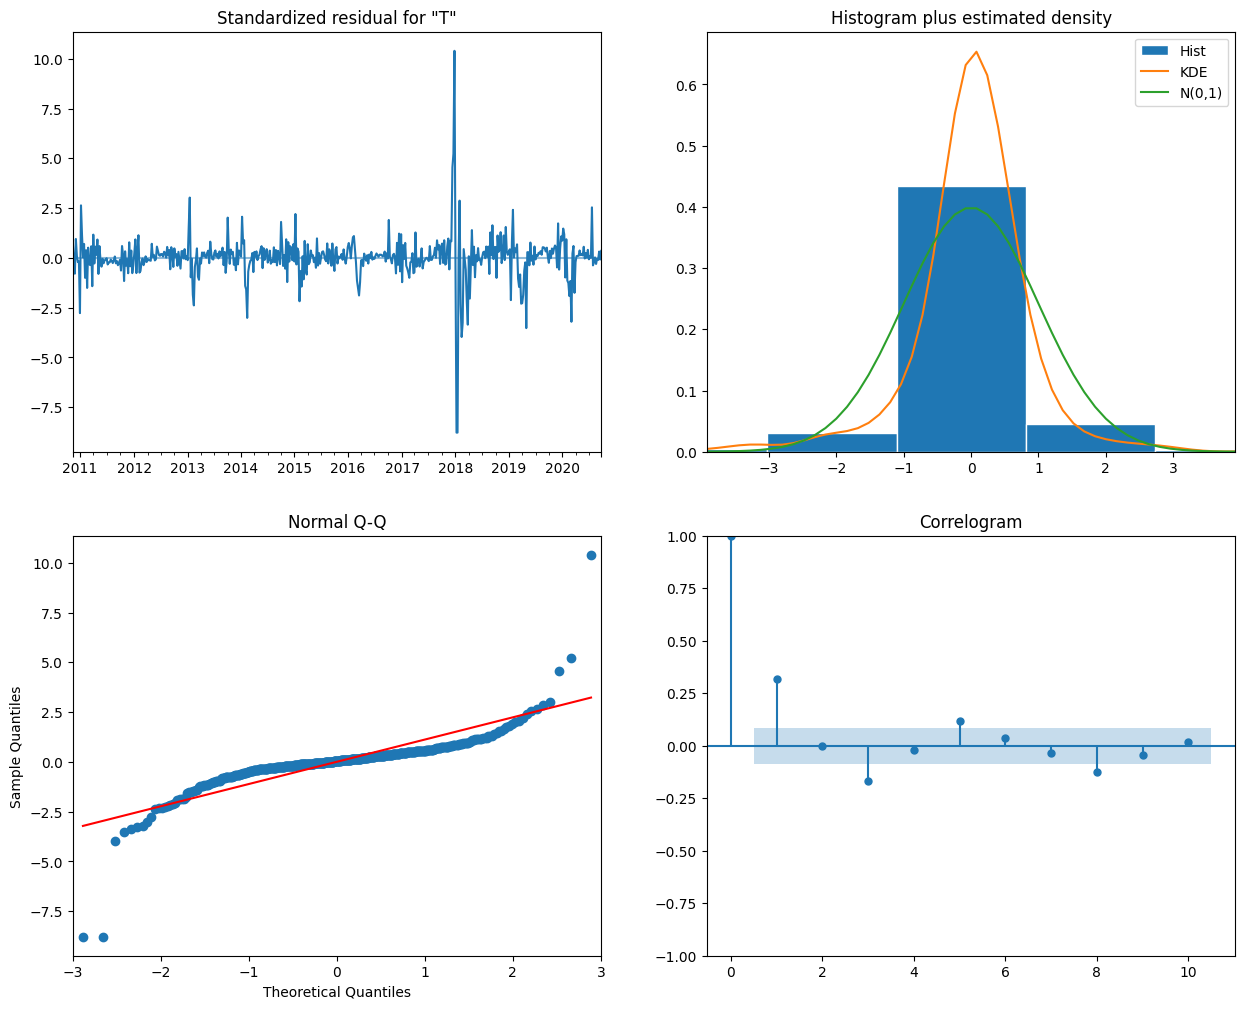

In [ ]:
# Fit a sample model for diagnostics
region = 'Lower Southern'
data = region_data[region]
model = ARIMA(data, order=best_pdq[region])
model_fit = model.fit()

# Diagnostic plots
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

# The code below is to view the error values in table view for ARIMA method

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason-2010-2020.csv')

# Convert weekending to datetime format
df['weekending'] = pd.to_datetime(df['weekending'])

# Set the index to weekending
df.set_index('weekending', inplace=True)

# Filter data for each region
regions = df['region'].unique()
region_data = {region: df[df['region'] == region]['Total_ILI'] for region in regions}

# Function to fit ARIMA model and forecast
def fit_arima_forecast(data, order=(5,1,0), steps=260):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit the model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.forecast(steps=len(test))

    # Calculate error metrics
    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)

    # Full forecast
    full_forecast = model_fit.forecast(steps=steps)

    return full_forecast, mae, mse, rmse

# Apply ARIMA to each region
arima_order = (5, 1, 0)  # Example order, you might want to tune this

forecasts = {}
error_metrics = {}
for region, data in region_data.items():
    full_forecast, mae, mse, rmse = fit_arima_forecast(data, order=arima_order)
    forecasts[region] = full_forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
results_df.to_csv('forecast_error_metrics.csv', index=False)

<ipython-input-38-d3e97ad2e1d4>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['weekending'] = pd.to_datetime(df['weekending'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency in

           Region         MAE           MSE         RMSE
0        Bay Area  263.300648  1.137641e+05   337.289298
1      California  810.607284  1.219914e+06  1104.497247
2         Central   71.463836  7.973070e+03    89.292046
3  Lower Southern  318.253570  1.937494e+05   440.169694
4        Northern  198.461363  8.850728e+04   297.501738
5  Upper Southern   32.398326  2.476399e+03    49.763434


# **NEURAL PROPHET METHODOLOGY**
- Install NeuralProphet: Ensure you have the neuralprophet package installed.
- Load and Preprocess the Data: Similar to ARIMA, load your dataset and preprocess it.
- Train NeuralProphet Model: Fit the NeuralProphet model to your data.
- Forecast and Evaluate: Use the model to forecast and evaluate the performance.

In [ ]:
# Install NeuralProphet
!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 49.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x

In [ ]:
!pip install plotly

In [ ]:
# Load and Preprocess the Data
# Load the dataset and preprocess it to fit the format required by NeuralProphet.
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason-2010-2020.csv')

# Convert weekending to datetime format with specified format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Prepare data for NeuralProphet
df.rename(columns={'weekending': 'ds', 'Total_ILI': 'y'}, inplace=True)

# Initialize NeuralProphet model
model = NeuralProphet()

# Create a dictionary to store forecasts and error metrics
forecasts = {}
error_metrics = {}

In [ ]:
# Loop through each region and fit the model
regions = df['region'].unique()
for region in regions:
    region_df = df[df['region'] == region][['ds', 'y']]

    # Initialize NeuralProphet model for each region
    model = NeuralProphet()

    # Train the model
    model.fit(region_df, freq='W')

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(region_df, periods=260)

    # Forecast
    forecast = model.predict(future)

    # Calculate error metrics
    train_size = int(len(region_df) * 0.8)
    train_df = region_df[:train_size]
    test_df = region_df[train_size:]

    forecast_train = model.predict(model.make_future_dataframe(train_df, periods=len(test_df)))
    mae = mean_absolute_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    mse = mean_squared_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    rmse = np.sqrt(mse)

    # Store results
    forecasts[region] = forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

# Create a list to store the data for each region
results = []

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekl

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
results_df.to_csv('neuralprophet_forecast_error_metrics.csv', index=False)

           Region         MAE            MSE        RMSE
0        Bay Area   99.782979   16112.499949  126.935023
1      California  290.538493  150990.172818  388.574540
2         Central   51.296945    3684.565650   60.700623
3  Lower Southern  152.482239   48076.048299  219.262510
4        Northern   96.157635   19868.294570  140.954938
5  Upper Southern   14.029994     517.648016   22.751879


In [66]:
# compare with SARIMA model results
#           Region         MAE           MSE         RMSE
#0        Bay Area  263.300648  1.137641e+05   337.289298
#1      California  810.607284  1.219914e+06  1104.497247
#2         Central   71.463836  7.973070e+03    89.292046
#3  Lower Southern  318.253570  1.937494e+05   440.169694
#4        Northern  198.461363  8.850728e+04   297.501738
#5  Upper Southern   32.398326  2.476399e+03    49.763434

# Re-code for showing plotly plot

In [ ]:
!pip install neuralprophet plotly pandas

In [ ]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot

# Set Plotly renderer for Google Colab
pio.renderers.default = 'colab'

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason-2010-2020.csv')

# Convert weekending to datetime format with specified format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Prepare data for NeuralProphet
df.rename(columns={'weekending': 'ds', 'Total_ILI': 'y'}, inplace=True)

In [ ]:
# Create dictionaries to store forecasts and error metrics
forecasts = {}
error_metrics = {}

# Loop through each region and fit the model
regions = df['region'].unique()
for region in regions:
    region_df = df[df['region'] == region][['ds', 'y']]

    # Initialize NeuralProphet model for each region
    model = NeuralProphet()

    # Train the model
    model.fit(region_df, freq='W')

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(region_df, periods=260)

    # Forecast
    forecast = model.predict(future)

    # Calculate error metrics
    train_size = int(len(region_df) * 0.8)
    train_df = region_df[:train_size]
    test_df = region_df[train_size:]

    forecast_train = model.predict(model.make_future_dataframe(train_df, periods=len(test_df)))
    mae = mean_absolute_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    mse = mean_squared_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    rmse = np.sqrt(mse)

    # Store results
    forecasts[region] = forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

    # Plot forecast using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=region_df['ds'], y=region_df['y'], mode='lines', name='Original'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast', line=dict(dash='dash')))
    fig.update_layout(title=f'Forecast for Total ILI in {region}', xaxis_title='Date', yaxis_title='Total ILI')

    # Display the plot inline (for Google Colab)
    iplot(fig)

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
#results_df.to_csv('neuralprophet_forecast_error_metrics.csv', index=False)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


           Region         MAE            MSE        RMSE
0        Bay Area   99.939529   16192.867927  127.251200
1      California  290.937297  153543.437378  391.846191
2         Central   51.348723    3689.564679   60.741787
3  Lower Southern  150.834672   46057.888345  214.611016
4        Northern   96.427951   19665.943976  140.235316
5  Upper Southern   14.010455     510.163084   22.586790


In [ ]:
fig.write_html(f"forecast_{region}.html")

In [ ]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objects as go
import plotly.io as pio
from google.colab import files

# Set Plotly renderer for Google Colab
pio.renderers.default = 'colab'

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason-2010-2020.csv')

# Convert weekending to datetime format with specified format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Prepare data for NeuralProphet
df.rename(columns={'weekending': 'ds', 'Total_ILI': 'y'}, inplace=True)

# Create dictionaries to store forecasts and error metrics
forecasts = {}
error_metrics = {}

# Loop through each region and fit the model
regions = df['region'].unique()
for region in regions:
    region_df = df[df['region'] == region][['ds', 'y']]

    # Initialize NeuralProphet model for each region
    model = NeuralProphet()

    # Train the model
    model.fit(region_df, freq='W')

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(region_df, periods=260)

    # Forecast
    forecast = model.predict(future)

    # Calculate error metrics
    train_size = int(len(region_df) * 0.8)
    train_df = region_df[:train_size]
    test_df = region_df[train_size:]

    forecast_train = model.predict(model.make_future_dataframe(train_df, periods=len(test_df)))
    mae = mean_absolute_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    mse = mean_squared_error(test_df['y'], forecast_train['yhat1'].iloc[-len(test_df):])
    rmse = np.sqrt(mse)

    # Store results
    forecasts[region] = forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

    # Plot forecast using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=region_df['ds'], y=region_df['y'], mode='lines', name='Original'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat1'], mode='lines', name='Forecast', line=dict(dash='dash')))
    fig.update_layout(title=f'Forecast for Total ILI in {region}', xaxis_title='Date', yaxis_title='Total ILI')

    # Display the plot inline (for Google Colab)
    iplot(fig)

    # Save the plot as an HTML file and download
    html_file = f"forecast_{region}.html"
    fig.write_html(html_file)
    files.download(html_file)

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
#results_df.to_csv('neuralprophet_forecast_error_metrics.csv', index=False)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

           Region         MAE            MSE        RMSE
0        Bay Area  100.994517   16500.716441  128.455114
1      California  292.175447  152997.386164  391.148803
2         Central   50.950870    3594.906412   59.957538
3  Lower Southern  149.335299   44627.248797  211.251624
4        Northern   96.807609   20080.928100  141.707191
5  Upper Southern   14.042955     515.523324   22.705139


In [ ]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objects as go
import plotly.io as pio
from google.colab import files

# Set Plotly renderer for Google Colab
pio.renderers.default = 'colab'

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/flu-ili-byregion-fluseason-2010-2020.csv')

# Convert weekending to datetime format with specified format
df['weekending'] = pd.to_datetime(df['weekending'], format='%m/%d/%y')

# Apply log transformation to ensure non-negative values
df['log_Total_ILI'] = np.log1p(df['Total_ILI'])

# Prepare data for NeuralProphet
df.rename(columns={'weekending': 'ds', 'log_Total_ILI': 'y'}, inplace=True)

# Create dictionaries to store forecasts and error metrics
forecasts = {}
error_metrics = {}

# Loop through each region and fit the model
regions = df['region'].unique()
for region in regions:
    region_df = df[df['region'] == region][['ds', 'y']]

    # Initialize NeuralProphet model for each region
    model = NeuralProphet()

    # Train the model
    model.fit(region_df, freq='W')

    # Make future dataframe for forecasting
    future = model.make_future_dataframe(region_df, periods=260)

    # Forecast
    forecast = model.predict(future)

    # Calculate error metrics
    train_size = int(len(region_df) * 0.8)
    train_df = region_df[:train_size]
    test_df = region_df[train_size:]

    forecast_train = model.predict(model.make_future_dataframe(train_df, periods=len(test_df)))
    mae = mean_absolute_error(np.expm1(test_df['y']), np.expm1(forecast_train['yhat1'].iloc[-len(test_df):]))
    mse = mean_squared_error(np.expm1(test_df['y']), np.expm1(forecast_train['yhat1'].iloc[-len(test_df):]))
    rmse = np.sqrt(mse)

    # Store results
    forecasts[region] = forecast
    error_metrics[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

    # Plot forecast using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=region_df['ds'], y=np.expm1(region_df['y']), mode='lines', name='Original'))
    fig.add_trace(go.Scatter(x=forecast['ds'], y=np.expm1(forecast['yhat1']), mode='lines', name='Forecast', line=dict(dash='dash')))
    fig.update_layout(title=f'Forecast for Total ILI in {region}', xaxis_title='Date', yaxis_title='Total ILI')

    # Display the plot inline (for Google Colab)
    fig.show()

    # Save the plot as an HTML file and download
    html_file = f"forecast_{region}.html"
    fig.write_html(html_file)
    files.download(html_file)

# Create a list to store the data for each region
results = []

# Loop through each region and gather the error metrics
for region in error_metrics:
    mae = error_metrics[region]['MAE']
    mse = error_metrics[region]['MSE']
    rmse = error_metrics[region]['RMSE']
    results.append([region, mae, mse, rmse])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Region', 'MAE', 'MSE', 'RMSE'])

# Display the DataFrame
print(results_df)

# Optionally, you can save the DataFrame to a CSV file
#results_df.to_csv('neuralprophet_forecast_error_metrics.csv', index=False)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with

Finding best initial lr:   0%|          | 0/219 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.808% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.808% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.615% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.615% of the data.
INFO - (NP.df_utils._infer_frequency

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SAT corresponds to 99.76% of the data.
INFO:NP.df_utils:Major frequency W-SAT corresponds to 99.76% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.048% of the data.
INFO:NP.df_utils:Major frequency W-SUN corresponds to 99.048% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO:NP.df_utils:Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

           Region         MAE            MSE        RMSE
0        Bay Area  109.652182   17883.395532  133.728813
1      California  272.911484  131933.214070  363.226120
2         Central   37.864005    3717.383008   60.970345
3  Lower Southern  130.641383   36523.832207  191.112093
4        Northern   79.525981   11463.713100  107.068731
5  Upper Southern   15.907264     918.142288   30.300863
